<font size=4 color='blue'>

# <center> Clase 4, febrero 18 del 2025 </center>

<font size=4 color='blue'>
    
## Sistema de estudio: Mortalidad por diabetes


<font size=5 color='magenta'>
<center>En busca de las variables X y Y que definen el sistema

<img src="./images/Diabetes.png" width=620 height=620 align = "center" >

<font size=5 color='blue'>
    
Información sobre el sistema de estudio

<font size=4 color='black'>

Evolución de la enfermedad de pacientes con Diabetes Mellitus despues de un año, variable Y.
    
En el presente trabajo, la diabetes la caracterizamos con los siguientes diez rasgos: edad, sexo, índice de masa corporal, presión arterial promedio y las seis mediciones de suero sanguíneo siguientes:

<font size=5>
    
     Colesterol Total 
     Baja densidad de lipoproteinas
     Alta densidad de lipoproteinas
     Triglicéridos
     Concentración de Lamorigina
     Glucosa

<font size=5 color='blue'>
    
Cuantificación de esta información

<font size=4>

Se tienen información de 442 pacientes (m = 442, m es el número de muestras). La variable de interés, $Y$, es una medida cuantitativa del progreso de la enfermedad un año después del inicio del estudio. Los valores de $Y$ varían entre 25 y 346

Fuente de la información: [diabetes data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)    Artículo original: [Least-Angle-Regression_2004](./Literatura/Least-Angle-Regression_2004.pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

In [2]:
# Los datos se encuentran el el archivo diabetes.csv. Estos se cargan en el objeto df del tipo DataFrame

df = pd.read_csv('diabetes.csv', sep ='\t')

# el objeto df contiene los 10 rasgos relevantes de los pacientes diabéticos,
# así como el progreso, Y , de la enfermedad un año después de comenzado el estudio. 

In [3]:
# Se despliegan las primeras 5 muestras (rasgos, objetivo)

df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


<font size=4>
Las abreviaciones en el encabezado tienen el siguiente significado:
    
    AGE = Age
    SEX = Sex
    BMI = Body Mass Index (BMI)
     BP = Mean Arterial Pressure (MAP)
     S1 = Total Cholesterol (TC)
     S2 = Low Density lipoproteins (LDL)
     S3 = High Density lipoproteins (HDL)
     S4 = Triglyceride (TG, TCH)
     S5 = Serum Concentration of Lamorigine (LTG)
     S6 = Glucose (GLU)
      Y = Quantitative Measure of Diabetes Mellitus Disease Progression (QMDMDP) one year after the baseline.

In [4]:
# El método "describe()" del DataFrame df genera una tabla con informacion estadistica
# de cada uno de los rasgos y del objetivo.

df.describe()



,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


## Se crean los histogramas para cada uno de los rasgos que caracteriza a los pacientes con diabetes:

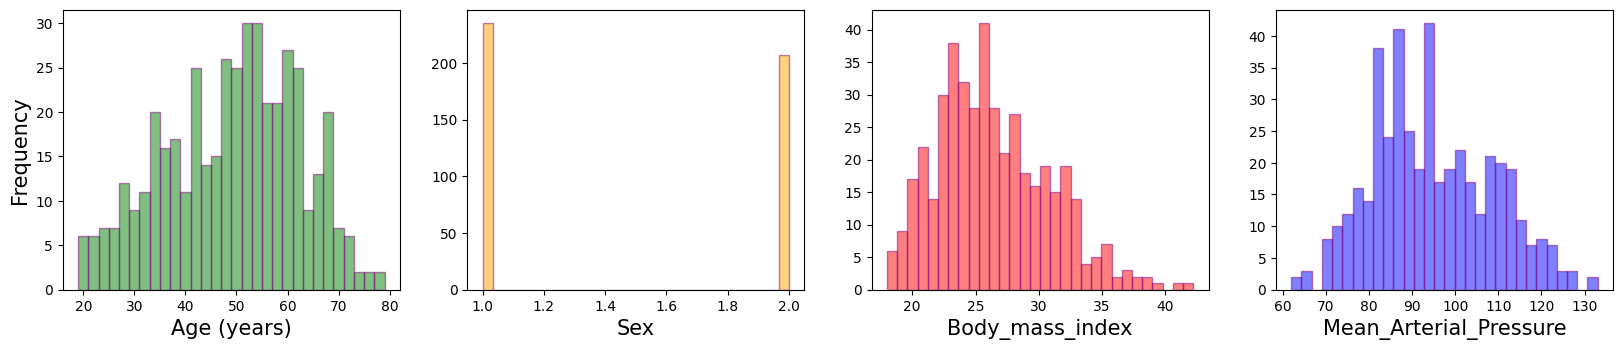

In [5]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Age (years)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Sex', size=15)

ax3.hist(df.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Body_mass_index', size=15)

ax4.hist(df.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Mean_Arterial_Pressure', size=15);

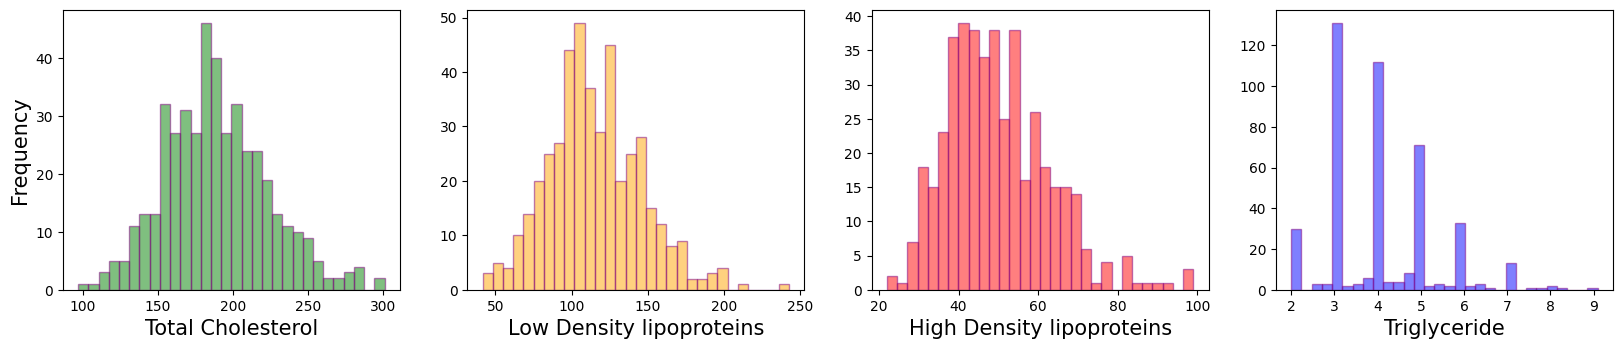

In [6]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Total Cholesterol', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Low Density lipoproteins', size=15)

ax3.hist(df.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('High Density lipoproteins', size=15)

ax4.hist(df.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Triglyceride', size=15);

Text(0.5, 0, 'Y(Diabetes Mellitus Disease Progression)')

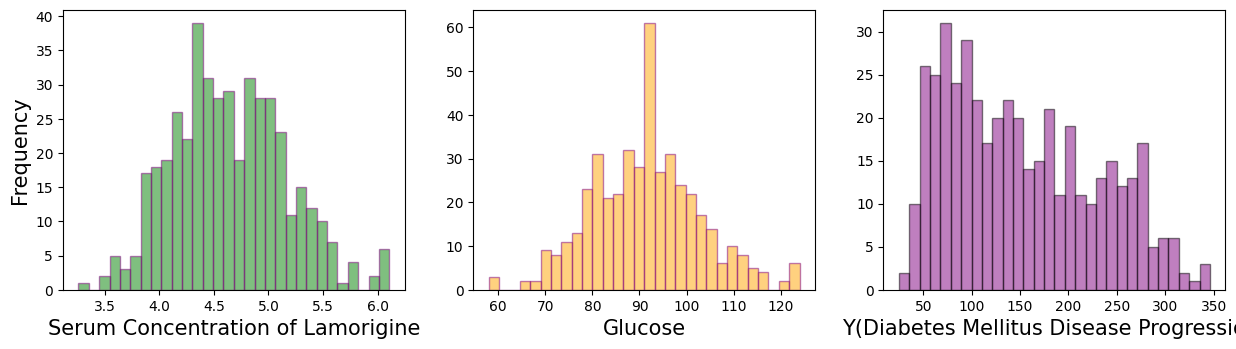

In [7]:
plt.figure(figsize=(15,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Serum Concentration of Lamorigine', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Glucose', size=15)

ax3.hist(df.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y(Diabetes Mellitus Disease Progression)', size=15)


<font size=6 color='blue'>

<center> El sistema de aprendizaje más simple </center>

<font size=4 color='red'>
Nota: Por única vez, las implementaciones en la "notebook" se harán totalmente en Python. 
    
$$$$
En el resto del curso emplearemos "$Frameworks$" mucho más amigables. $$$$
Por ejemplo $TensorFlow$, $PyTorch$, $Keras$, $scikit-learn$ o $PyTorch$ $Lightning$

<font size=5 color='blue'>
    

Proponemos que $Y$ depende linealmente con cada una de las variables $X$

<font size=4 >
Los pasos principales para construir el sistema son:

1. Definir un modelo proponiendo un algoritmo que relacione linealmente las variables X y Y.
2. Inicializar los parámetros que determinan el modelo, $w, b$ (pesos y biases).
3. Realizar lo siguiente en cada época:
     - Calcular el costo ($J$) o pérdida (loss, $L$), o error (error, $E$).
     - Calcular el gradiente del costo respecto a los parámetros del modelo.
     - Actualizar los pesos y los biases empleando el algoritmo propuesto para la optimización. Por ejemplo, gradiente descendente. 

<font size=5 color='blue'>
Algoritmo que relaciona las variables X y Y

<font size=4 >
    
Si se tienen $m$ muestras.
    
Para la muestra $j\in m$, con sus valores de la variable $X$, $X^{(j)}$ = $(x_{1}^{(j)}, x_{2}^{(j)}, x_{3}^{(j)},...,x_{N}^{(j)} )$, se genera la variable $Z^{(j)}$ mediante la siguiente relación:

$$Z^{(j)} = w^T X^{(j)} + b = \sum_{i=1}^N w_{i} x_{i}^{(j)} + b $$

$Z^{(j)}$ es la suma pesada las variables $X^{(j)}$ con los pesos $w_i$, mas el bias b. Posteriormente, esta sumatoria es transformada ("activada") con una función, para generar la variable de salida $a^{(j)}$. 
    
Dado que inicialmente planteamos que en el sistema de aprendizaje $Y$ varía linealmente con cada una de las variables $X$, la función de transformación es la identidad $f(Z)=Z$.

$$F(W,X^{(j)}) = a^{(j)} = f(Z^{(j)})=Z^{(j)}$$ 

$W$ representa tanto a los pesos $w_i$ como al bias $b$.
Para realizar el aprendizaje, se genera una métrica para el error, la cual queda definida por la función de perdida (*loss*), tambien llamada función de costo (*cost*) $J$. Esta función se obtiene realizando el promedio, sobre todas las $m$ muestras, del cuadrado de la diferencia entre el valor ($y^{(j)}$) de la muestra $j$ y el valor de la función $F(X^{(j)})$.  

$$ J = \frac{1}{m} \sum_{j=1}^m (y^{(j)} -F(W,X^{(j)}))^2$$




<font size=5 color='blue'>

Al inicio del proceso, para quitar cuarquier posible correlación entre las muestras, o sesgo en su generación, estas se reordenan al azar.

<font size=4>
Mostrar las primeras 5 muestras 

In [8]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


 <font size=4>
    
 Reordenar el 100% del DataFrame que contiene las muestras:

In [9]:
df = df.sample(frac=1)

In [10]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
119,53,1,22.0,94.0,175,88.0,59.0,3.0,4.9416,98,200
207,51,1,30.6,103.0,198,106.6,57.0,3.0,5.1475,100,202
236,56,1,27.0,105.0,247,160.6,54.0,5.0,5.0876,94,67
288,68,2,24.8,101.0,221,151.4,60.0,4.0,3.8712,87,80
174,53,2,27.3,82.0,119,55.0,39.0,3.0,4.8283,93,151


<font size=5 color='blue'>
División de las muestras para aprender y para hacer predicciones

<font size=4>
    
Se dividen la muestras originales en 2 conjuntos: 90 % para el entrenamiento y 10 % para hacer inferencias (predicciones) con el sistema que ya aprendió.

In [11]:
test_ratio = 0.1

train_ratio = int((1.0-test_ratio)*len(df.values[:,:]))

df_train = df.iloc[0:train_ratio,:]
df_test  = df.iloc[train_ratio:,:]

In [12]:
print(df_train.shape)
print(df_test.shape)

(397, 11)
(45, 11)


<font size=5 color='blue'>  
Dada una distribución, podemos calcular su valor promedio $\mu$ y su varianza $\sigma$

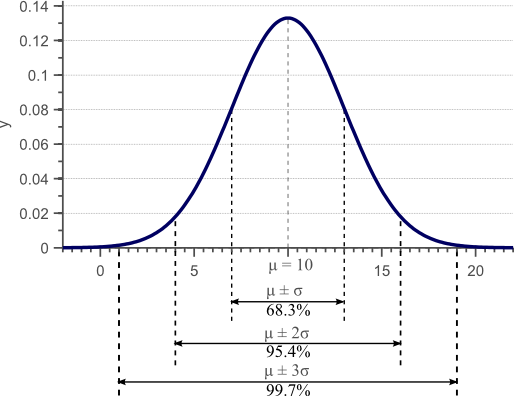


<font size=4>

Para trabajar con los modelos de aprendizaje,es adecuado que todas las variables tengan el mismo orden de magnitud. Por ello, se normalizan sus valores en las muestras que se emplearán en el entrenamiento, tanto las variables que describen los rasgos (X) como las variables objetivo (Y):

$$x_{i,norm} = \dfrac{x_{i}-\mu}{\sigma}$$
    
$$y_{i,norm} = \dfrac{y_{i}-\mu}{\sigma}$$

In [13]:
mu = df_train.mean()
sigma = df_train.std()

df_train_norm = (df_train - mu) / sigma

df_train_norm.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
119,0.335209,-0.942461,-0.976628,-0.058872,-0.380025,-0.891602,0.710641,-0.819272,0.597978,0.599470,0.607085
207,0.183898,-0.942461,0.953450,0.580528,0.278171,-0.271609,0.554317,-0.819272,0.991090,0.770994,0.632786
236,0.562176,-0.942461,0.145511,0.722617,1.680416,1.528370,0.319833,0.771742,0.876726,0.256422,-1.102042
288,1.470042,1.058379,-0.348230,0.438439,0.936368,1.221707,0.788802,-0.023765,-1.445669,-0.343912,-0.934985
174,0.335209,1.058379,0.212839,-0.911406,-1.982591,-1.991589,-0.852591,-0.819272,0.381661,0.170660,-0.022594


In [14]:
df_train.mean()

AGE     48.569270
SEX      1.471033
BMI     26.351637
BP      94.828665
S1     188.279597
S2     114.748363
S3      49.908060
S4       4.029874
S5       4.628397
S6      91.010076
Y      152.758186
dtype: float64

In [15]:
df_train.std()

AGE    13.217809
SEX     0.499790
BMI     4.455779
BP     14.075684
S1     34.943965
S2     30.000351
S3     12.794006
S4      1.257060
S5      0.523770
S6     11.660167
Y      77.817495
dtype: float64

In [16]:
#(df['AGE']-48.56)/13.21

<font size=5 color='red'> 
Nota importante: La normalización de las muestras de prueba se realiza con los valores de $\mu$ y $\sigma$ obtenidos con las muestras empleadas para el entrenamiento

In [17]:
df_test_norm = (df_test - df_train.mean()) / df_train.std()
df_test_norm.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
313,1.243075,1.058379,1.110549,1.077840,0.707430,0.441716,-0.227299,0.771742,1.181059,-0.000864,0.131613
31,-0.497001,-0.942461,-1.358155,-1.692896,-0.780667,-1.118266,1.257772,-1.614780,-0.752807,-0.858485,-1.204847
321,1.999630,-0.942461,1.088107,1.622751,1.165306,0.801712,-1.634207,3.078713,2.091001,1.285567,0.992602
140,0.864798,1.058379,0.302610,0.864706,-0.608963,-0.004945,-0.930753,-0.023765,-0.671474,0.342184,-0.446663
89,-0.950934,-0.942461,-0.999070,-0.414095,0.020616,-0.318275,1.414095,-0.819272,-0.494487,0.427946,-0.536617


<font size=4>
    
Histogramas de las variables que se emplearán en el entrenamiento:

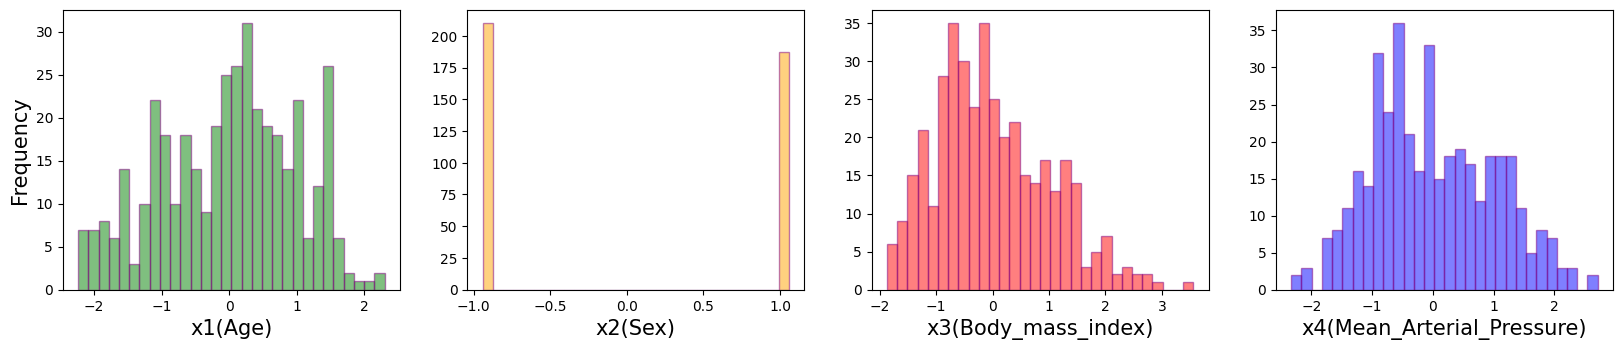

In [18]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train_norm.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x1(Age)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x2(Sex)', size=15)

ax3.hist(df_train_norm.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x3(Body_mass_index)', size=15)

ax4.hist(df_train_norm.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x4(Mean_Arterial_Pressure)', size=15);

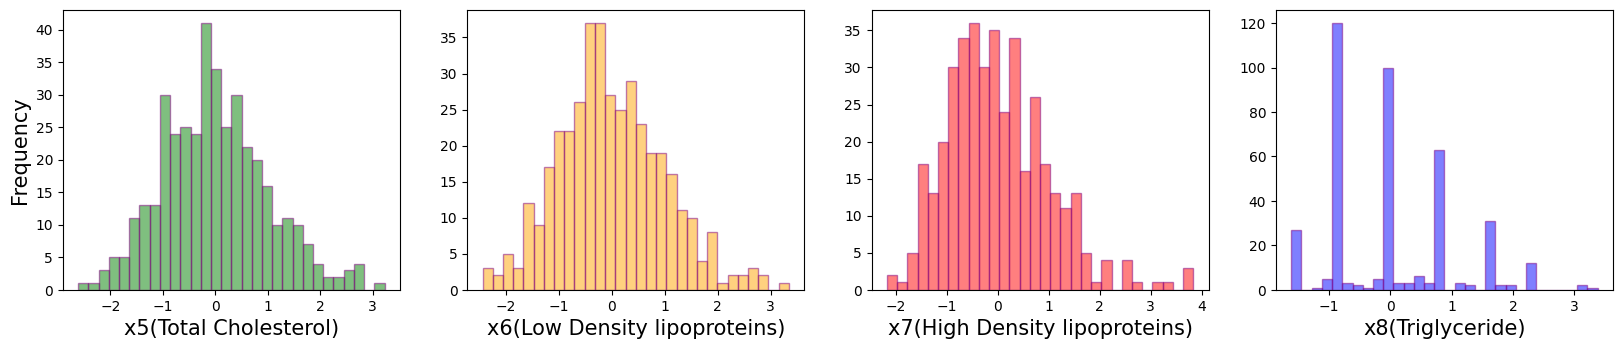

In [19]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train_norm.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x5(Total Cholesterol)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x6(Low Density lipoproteins)', size=15)

ax3.hist(df_train_norm.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x7(High Density lipoproteins)', size=15)

ax4.hist(df_train_norm.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x8(Triglyceride)', size=15);

Text(0.5, 0, 'Y(Diabetes Mellitus Disease Progression)')

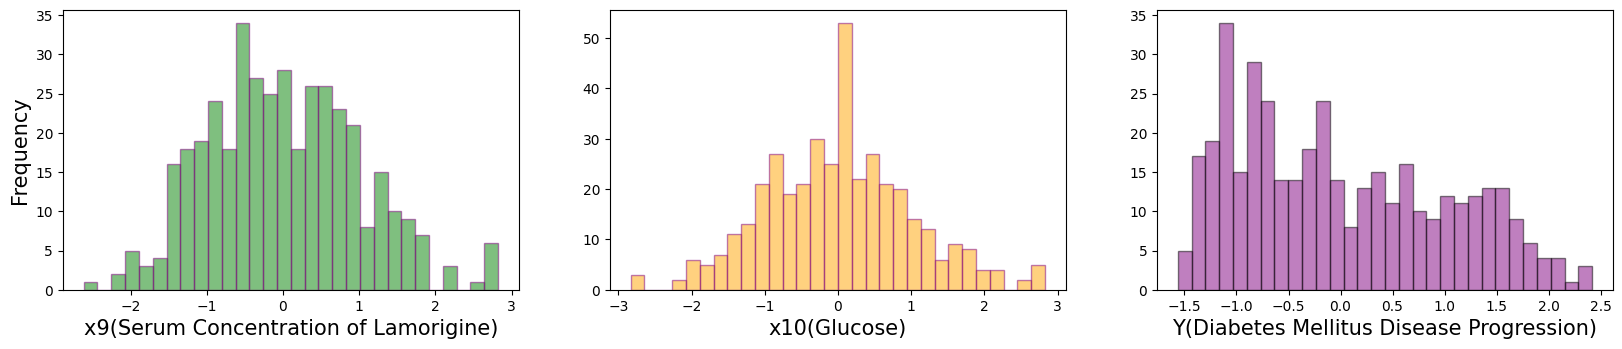

In [20]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df_train_norm.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x9(Serum Concentration of Lamorigine)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x10(Glucose)', size=15)

ax3.hist(df_train_norm.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y(Diabetes Mellitus Disease Progression)', size=15)


<font size=4>
Los valores de las variables X e Y se extraen de las columnas del DataFrame.

In [21]:
x_train = df_train_norm.values[:,:-1]
y_train = df_train_norm.values[:,-1:]
print(type(x_train), type(y_train))
print(x_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(397, 10)
(397, 1)


In [22]:
x_test = df_test_norm.values[:,:-1]
y_test = df_test_norm.values[:,-1:]
print(type(x_test), type(y_test))
print(x_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(45, 10)
(45, 1)


In [23]:
train_x = x_train.T
test_x = x_test.T

train_y = y_train.T
test_y =  y_test.T

In [24]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(10, 397)
(1, 397)
(10, 45)
(1, 45)


In [25]:
train_x[:,1:3]

array([[ 0.18389814,  0.56217567],
       [-0.94246123, -0.94246123],
       [ 0.95345001,  0.14551051],
       [ 0.58052847,  0.72261748],
       [ 0.27817115,  1.68041613],
       [-0.27160891,  1.52837   ],
       [ 0.55431733,  0.31983254],
       [-0.81927229,  0.77174223],
       [ 0.99108954,  0.87672627],
       [ 0.77099448,  0.25642209]])

 <font size=5 color='blue'>    
Se inicializan los parámetros $W$ de la función, $F(W,X)$, que define la relación entre X y Y. 

<font size=4>
Debido a que las variables $X$ y $Y$ fueron normalizadas a distribuciones con el ancho de una un deviación estándar, los valores de los parámetros $w_i$ se inicializan con valores pequeños, mientras que el bias $b$ se inicializa con cero.

In [26]:
def initialize_params(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.reshape(np.random.uniform(-0.1, 0.1, dim), (dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [27]:
#Testing the function initialize_params (dim)

dim = train_x.shape[0]
w, b = initialize_params(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[-0.0264567 ]
 [ 0.0339371 ]
 [-0.01864974]
 [-0.02860994]
 [ 0.04199023]
 [ 0.01145439]
 [ 0.09939795]
 [-0.02523098]
 [ 0.04018608]
 [ 0.00879775]]
b = 0


 <font size=5 color='blue'> 
    
Cálculo de la función de costo y sus derivadas parciales respecto a sus parámetros

<font size=4>
Una vez inicializados los pesos y el bias, se calcula la función de costo, y sus derivadas parciales respecto a cada uno de los pesos $w_{i}$ y el bias $b$. Estas derivadas se emplean para proponer nuevos valores tanto para los pesos como para el bias. 

La funcion *propagate( )* calcula la función de costo y su gradiente:

- Se tiene X $$ $$
- Se calcula $$A = (w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$$ $$ $$
- Se calcula la función de costo: $$J = \frac{1}{m}\sum_{j=1}^m(y^{(j)} -F(W,X^{(j)}))^2$$


Las derivadas de la funcion de costo respecto a los pesos $ w_k$ y el bias $ b$ son:


$$ \frac{\partial J}{\partial w_i} = \frac{1}{m}X(A-Y)^T$$ $$ $$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{j=1}^m (F(W,X^{(j)})-y^{(j)}))$$

In [28]:
#Definición de la función identidad.

def identity(z):
    """
    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- z
    """
    s = 1.0 * z
    
    return s

In [29]:
def propagate(w, b, X, Y,X_val,Y_val):
    
    m = X.shape[1]
    m_val = X_val.shape[1]
    
    A = identity(np.dot(w.T, X)+b)
    A_val = identity(np.dot(w.T,X_val)+b)
    
    cost = (1/m)*np.sum((Y-A)**2)
    cost_val = (1/m_val)*np.sum((Y_val-A_val)**2)
    
    dw = (1/m)*np.dot(X, (A-Y).T)
    
    db = (1/m)*np.sum(A-Y)
    

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    cost_val = np.squeeze(cost_val)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost, cost_val

In [30]:
x1_val = np.array([[1.,2.,-2.],[2.,4.,-3.2]])
y1_val = np.array([[1,0,2]])

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost, cost_val = propagate(w, b, X, Y,x1_val, y1_val)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))
print ("cost val = " + str(cost_val))


dw = [[12.8       ]
 [30.82666667]]
db = 4.533333333333333
cost = 82.98666666666666
cost val = 83.52


<font size=5 color='blue'> 
Actualizacion de los pesos y el bias

<font size=5 color='black'> 
Para monitorear el entrenamiento, las muestras para el entrenamiento se dividen en dos grupos:

<font size=4 color='black'>
El 90% de ellas se emplean para realizar el entrenamiento y el 10% restante para evaluar, "validar", la calidad del entrenamiento en cada época.

<font size=4>
    
La función *optimize(  )*  actualiza los pesos $w$ y el bias $b$ usando el método de gradiente descendente.

Se calcula la función de costo para las muestras empleadas en el entrenamiento y para las asignadas a la validación.
    
Los pesos $ w $ y el bias $ b $ son modificados en cada época hasta que la función de costo $ J $ llega a su valor mínimo. 

Los pesos $ w_{k} $ y el bias $b$ se actualizan mediante la siguientes relaciones: $$ $$ $$ w_{k} := w_{k} - \alpha \frac{\partial J}{\partial w_{k}} $$

$$ b := b - \alpha \frac{\partial J}{\partial b} $$ $$ $$ $ \alpha $ es el hyperparámetro llamado relación de aprendizaje.

In [31]:
def optimize(w, b, X, Y, X_val, Y_val, epochs, learning_rate, print_cost = False):
    
    costs = []
    costs_val = []
    
    for i in range(epochs):
        
        
        grads, cost, cost_val = propagate(w, b, X, Y,X_val,Y_val)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
            costs_val.append(cost_val)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost and Cost_val after epoch %i: %f %f" %(i, cost, cost_val))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs, costs_val

<font size=5 color='blue'>
Calculo de inferencias (predicciones)

<font size=4>
    
Una vez que se encuentran los valores de los pesos $w$ y del bias $b$ que minimizan la función de costo, la función, $F(W,X)$ que se obtiene representa al sistema ya está entrenado, "el sistema ya aprendió". Este sistema entrenado, representado por la función $F(W,X)$ final se emplea para predecir los valores de la variable Y correspondientes a las muestras de prueba, los cuales se comparan con los valores Y reales asociados a estas muestras.

La función `predic()` calcula $F(W,X)=w ^ T X + b$ empleando los valores de $w_{opt}$ y $b_{opt}$ para los cuales el costo es mínimo.


In [32]:
def predict(w, b, X):
    
    w = w.reshape(X.shape[0], 1)
    
    A = identity(np.dot(w.T, X)+b)
    
    return A

<font size=4>
Para calcular la precision del modelo, a manera de ejemplo, se usa el error cuadático medio, MSE: $$ $$

$$100-MSE*100$$

es decir

$$100-(\dfrac{1}{m_{test}}\sum_{i}^{m_{test}} (y^{(i)}-a^{(i)})^2)*100$$ 

<font size=5 color='blue'>
$$ $$
Sistema de aprendizaje: se integran los pasos descritos anteriormente

In [33]:
def model(X_train, Y_train, val_ratio, epochs = 2000, learning_rate = 0.5, print_cost = False):

    
    train_ratio = int((1-val_ratio)*X_train.shape[1])
    X_val = X_train[:,train_ratio:]
    Y_val = Y_train[:,train_ratio:]

    X_train = X_train[:,:train_ratio]
    Y_train = Y_train[:,:train_ratio]
    
    print("Train",X_train.shape,Y_train.shape)
    print("val",X_val.shape,Y_val.shape)
    
    # 1. inicializacion de parametros
    w, b = initialize_params(X_train.shape[0])

    # 2. y 3. Actualizacion de parametros
    parameters, grads, costs, costs_val = optimize(w, b, X_train, Y_train, X_val, Y_val, epochs, learning_rate, print_cost = print_cost)
    
    w = parameters["w"]
    b = parameters["b"] #F(X,W,b) optimizada que me da los mejores resultados; es decir, con el costo más bajo posible
    
    # 4. Predicciones
    Y_prediction_val = predict(w, b, X_val)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_train - Y_train, 2)) * 100))
    print("val accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_val - Y_val, 2)) * 100))

    
    d = {"costs": costs, "costs_val": costs_val,
         "Y_prediction_val": Y_prediction_val, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "epochs": epochs}
    
    return d        

In [34]:
print(train_x.shape[1])


397


In [35]:
epochs = 2000
learning_rate = 0.005
val_ratio = 0.1
d = model(train_x, train_y, val_ratio=val_ratio, epochs = epochs, 
          learning_rate = learning_rate, print_cost = True)

Train (10, 357) (1, 357)
val (10, 40) (1, 40)
Cost and Cost_val after epoch 0: 0.871025 0.982051
Cost and Cost_val after epoch 100: 0.559056 0.545363
Cost and Cost_val after epoch 200: 0.508819 0.471513
Cost and Cost_val after epoch 300: 0.490839 0.446973
Cost and Cost_val after epoch 400: 0.483264 0.437823
Cost and Cost_val after epoch 500: 0.479720 0.434680
Cost and Cost_val after epoch 600: 0.477899 0.434045
Cost and Cost_val after epoch 700: 0.476883 0.434450
Cost and Cost_val after epoch 800: 0.476276 0.435243
Cost and Cost_val after epoch 900: 0.475888 0.436133
Cost and Cost_val after epoch 1000: 0.475628 0.436992
Cost and Cost_val after epoch 1100: 0.475442 0.437769
Cost and Cost_val after epoch 1200: 0.475304 0.438449
Cost and Cost_val after epoch 1300: 0.475194 0.439034
Cost and Cost_val after epoch 1400: 0.475105 0.439532
Cost and Cost_val after epoch 1500: 0.475028 0.439955
Cost and Cost_val after epoch 1600: 0.474960 0.440312
Cost and Cost_val after epoch 1700: 0.474899 0.4

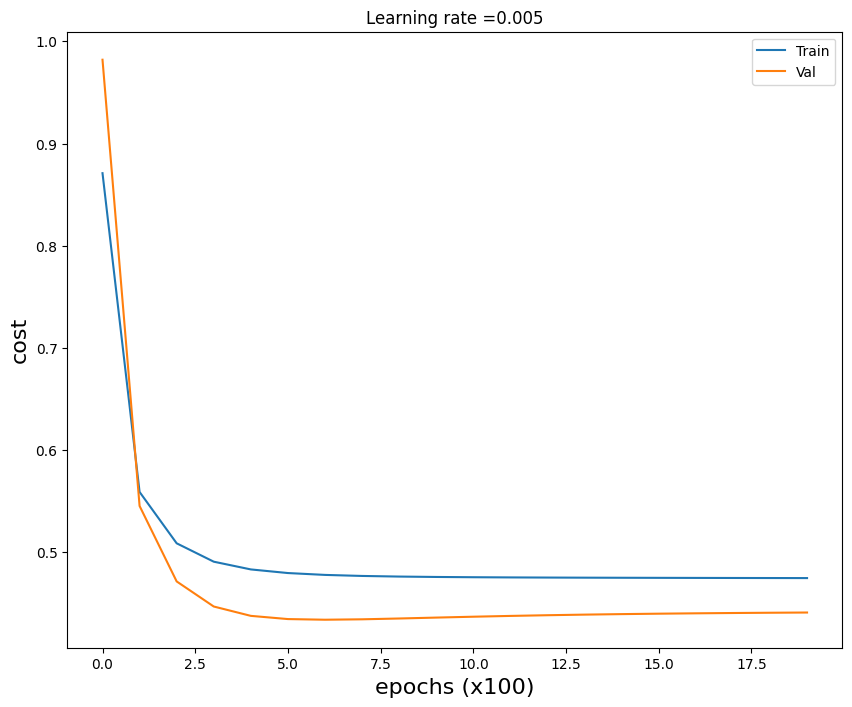

In [36]:
costs = np.squeeze(d['costs'])
costs_val = np.squeeze(d['costs_val'])

plt.figure(figsize=(10,8)) 

plt.plot(costs)
plt.plot(costs_val)
plt.ylabel('cost', size=16)
plt.xlabel('epochs (x100)', size=16)
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [37]:
predictions_test = predict(d["w"], d["b"], test_x)
print(np.mean(np.power((predictions_test-test_y), 2)))


print("test accuracy: {} %".format(100 - np.mean(np.power(predictions_test-test_y, 2)) * 100))

0.5398469604769324
test accuracy: 46.015303952306766 %


learning rate is:  0.01
Train (10, 357) (1, 357)
val (10, 40) (1, 40)
train accuracy: 52.720394726181006 %
val accuracy: 56.06916312508577 %

-------------------------------------------------------

learning rate is:  0.005
Train (10, 357) (1, 357)
val (10, 40) (1, 40)
train accuracy: 52.597808321102676 %
val accuracy: 56.07798768258526 %

-------------------------------------------------------

learning rate is:  0.001
Train (10, 357) (1, 357)
val (10, 40) (1, 40)
train accuracy: 51.976024201400826 %
val accuracy: 57.19014687560704 %

-------------------------------------------------------



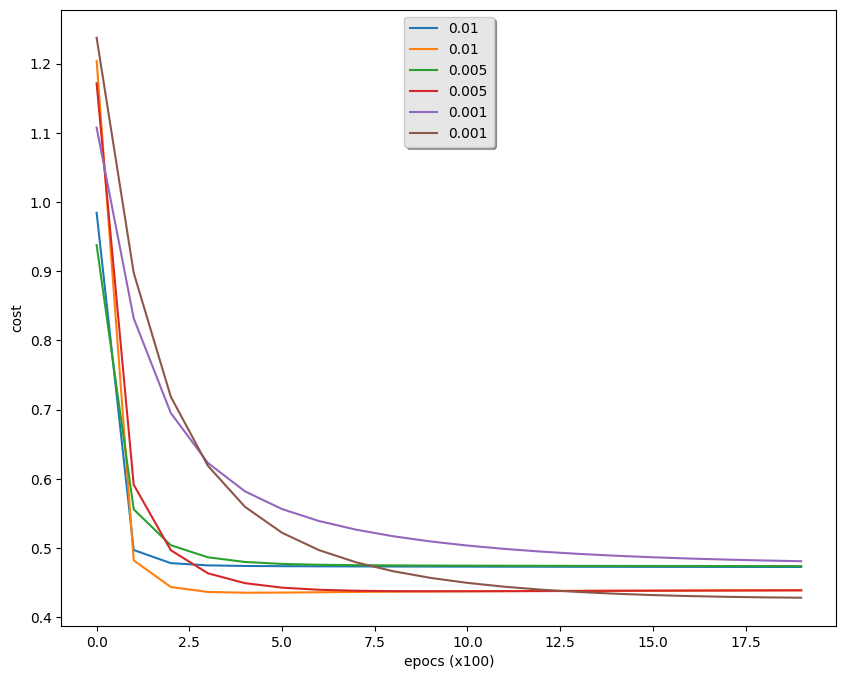

In [38]:
learning_rates = [0.01, 0.005, 0.001]

plt.figure(figsize=(10,8)) 
val_ratio = 0.1
models = {}
for i in learning_rates:
    print ("learning rate is: ", i)
    models[str(i)] = model(train_x, train_y, val_ratio=val_ratio, epochs = 2000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
    plt.plot(np.squeeze(models[str(i)]["costs_val"]), label= str(models[str(i)]["learning_rate"]))
    
plt.ylabel('cost')
plt.xlabel('epocs (x100)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

<font size=6 color='blue'>

<center> Modificamos este sistema simple de aprendizaje </center>

<font size=5 color='blue'>
    

Proponemos que $Y$ no depende linealmente con cada una de las variables $X$, sino que dependencia sea ligeramente no lineal

<font size=4>
    
Para nuestro nuevo sistema de aprendizaje, la función $F(W,X)$ ya no varía linealmente con X. La relación (2) de las siguientes ecuaciones ya no es válida:
    
    
$$Z^{(j)} = w^T X^{(j)} + b = \sum_{i=1}^N w_{i} x_{i}^{(j)} + b $$

    
$$F(W,X^{(j)}) = a^{(j)} = f(Z^{(j)})=Z^{(j)}$$ 


Para tomar en cuenta la no linealidad, la función $f(z)=z$ se cambia por una función ligeramente no lineal alrededor de cero. Esto se logra empleando en su lugar una función del tipo sigmoid, por ejemplo $f(z)=tanh(z)$. Con este cambio, la ecuación (2) se transforma entonces en: $$ $$
$$F(W,X^{(j)}) = a^{(j)} = f(Z^{(j)}) = tanh(Z^{(j)})$$     

In [39]:
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [40]:
def atanh(x):
    return 1.7159*tanh(2*x/3)

In [41]:
print(atanh(-1.0), atanh(1.0))

-0.9999972559224789 0.9999972559224789


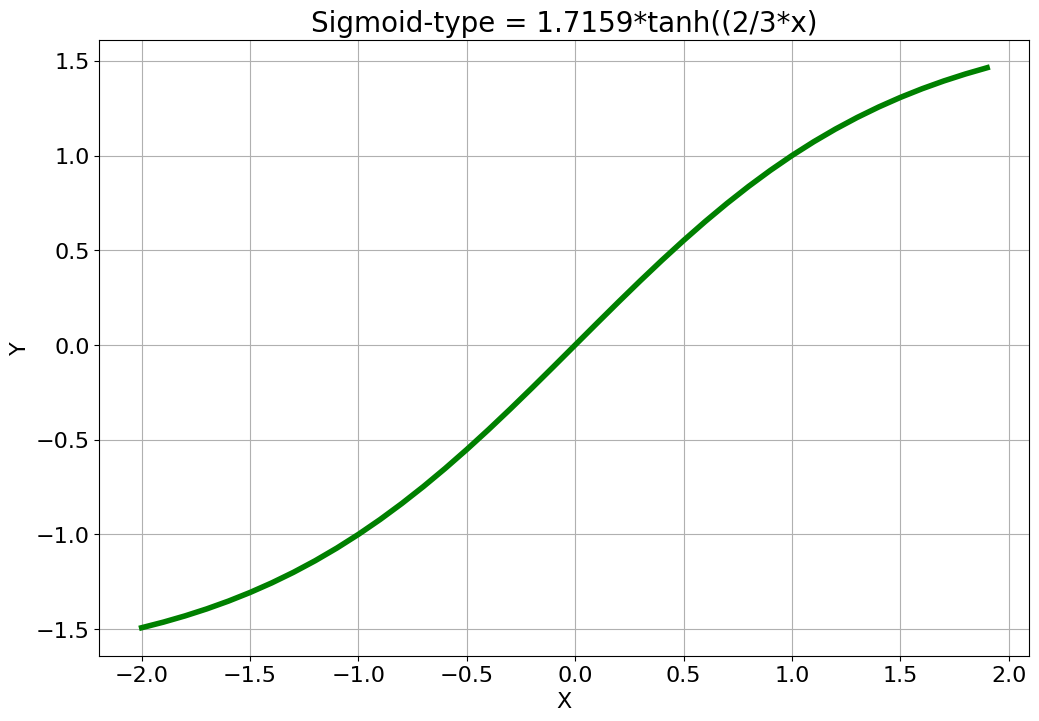

In [42]:
#The following arrays are generated for plotting the Function F(x, weight_0, bias_0)
x_ = np.arange(-2, 2.0, 0.1)
y_ = atanh(x_)
#Samples and function F are plotted
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.grid(True)
plt.title('Sigmoid-type = 1.7159*tanh((2/3*x)', size=20)

#Plotting function
plt.plot(x_, y_, color='green', lw=4)

plt.show()

<font size=5 color='blue'>
Sistema de aprendizaje que relaciona las variables X y Y

<font size= 4>
Se tienen $m$ muestras. 
    
Para una muestra $j \in m$ $X^{(j)}$:

$$Z^{(j)} = w^T X^{(j)} + b $$

$Z^{(j)}$ es la combinacion lineal entre los pesos ($w$) y la muestra $X^{(j)}$ + el bias b. Posteriormente esta sumatoria es transformada, para generar el valor de salida $a^{(j)}$, mediante una función. En el presente caso la función es del tipo sigmoide (*atanh*), porque la relación es ligeramente no-lineal.

$$ a^{(j)} = atanh(Z^{(j)})$$ 

La funcion de perdida (*loss*), tambien llamada costo *cost*, $\textbf {J}$, es el promedio, sobre todas las muestras, de la diferencia al cuadrado entre el valor medido ($Y^{(j)}$) y el valor que predice la funcion de activacion ($a^{(j)}$).  

$$ J = \frac{1}{m} \sum_{j=1}^m (a^{(j)} - Y^{(j)})^2$$




<font size=4>

[Activation-function](./Literatura/Efficient-backprop_Lecun_1998.pdf)$$ $$
Con ello, la varianza es cercana a 1, el valor de la función es ligeramente no lineal entre -1 y +1, y la derivada es máxima para $Z^{(j)} = 1$ 
$$ $$
Con esto, la función de costo, $J$ está dada por:

$$ J = \dfrac{1}{m}\sum_{i=0}^{m}(1.7159*tanh(2*Z^{(j)}/3)-Y^{(j)})^2$$

<font size=5 color='blue'>   
Se inicializan los parámetros del sistema de aprendizaje que definen la relación entre las variables $X$ y $Y$. 

In [43]:
def initialize_params_1(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.reshape(np.random.uniform(-0.1, 0.1, dim), (dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [44]:
def atanh(x):
    return 1.7159*tanh(2*x/3)

In [45]:
def d_atanh(z):
    return 1.7159*(1-np.square(atanh(z)))*(2/3)

In [46]:
# Probando el código

dim = train_x.shape[0]
w, b = initialize_params(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[-0.0865963 ]
 [-0.07762903]
 [-0.04094704]
 [-0.07304322]
 [ 0.03297021]
 [-0.03668186]
 [-0.03459227]
 [-0.06758834]
 [-0.08718662]
 [ 0.04826738]]
b = 0


In [47]:
def propagate_1(w, b, X, Y, X_val, Y_val):
    
    m = X.shape[1]
    m_val = X_val.shape[1]
    
    A = atanh(np.dot(w.T, X)+b)
    A_val = atanh(np.dot(w.T,X_val)+b)
    
    cost = (1/m)*np.sum((Y-A)**2)
    cost_val = (1/m_val)*np.sum((Y_val-A_val)**2)
    
    dA = A-Y
    dZ = d_atanh(np.dot(w.T, X)+b)
    
    dw = (1/m)*np.dot(dA, (dZ*X).T).T    
    db = (1/m)*np.sum((A-Y)*(1-np.power(A, 2)), axis=1, keepdims=True)  
    
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    cost_val =np.squeeze(cost_val)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost, cost_val

In [48]:
x1_val = np.array([[1.,2.,-2.],[2.,4.,-3.2]])
y1_val = np.array([[1,0,2]])

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost, cost_val = propagate_1(w, b, X, Y,x1_val, y1_val)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))
print ("cost val = " + str(cost_val))


dw = [[ -5.07757178]
 [-13.08893287]]
db = [[0.17455838]]
cost = 3.6063356189939464
cost val = 5.753094985760744


<font size=4>
    
La función *optimize_1(  )*  actualiza los pesos $w$ y el bias $b$ usando el método de gradiente descendente.

Se calcula la función de costo para las muestras empleadas en el entrenamiento y para las asignadas a la validación.
    
Los pesos $ w $ y el bias $ b $ son modificados en cada época hasta que la función de costo $ J $ llega a su valor mínimo. 

Los pesos $ w_{i} $ y el bias $b$ se actualizan mediante la siguientes relaciones: $$ $$ $$ w_{i} := w_{i} - \alpha \frac{\partial J}{\partial w_{i}} $$

$$ b := b - \alpha \frac{\partial J}{\partial b} $$ $$ $$ $ \alpha $ es el hyperparámetro que define la relación de aprendizaje.

In [49]:
def optimize_1(w, b, X, Y, X_val, Y_val, epochs, learning_rate, print_cost = False):
    
    costs = []
    costs_val = []
    
    for i in range(epochs):
        
        grads, cost, cost_val = propagate_1(w, b, X, Y, X_val, Y_val)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update parameters
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            costs_val.append(cost_val)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost and Cost_val after iteration %i: %f %f" %(i, cost, cost_val))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs, costs_val

In [50]:
epochs = 100
params, grads, costs, costs_val = optimize_1(w, b, X, Y, x1_val, y1_val, epochs=epochs, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[ 5.57950249]
 [13.81103216]]
b = [[1.83448553]]
dw = [[ -5.08859121]
 [-13.12418521]]
db = [[0.18412642]]


<font size=4>
Una vez que se encuentran los valores de los pesos 𝑤 y del bias 𝑏 que minimizan la función de costo, la función, $𝐹(W,𝑋)$ que se genera con estos valores se emplea para inferir valores de Y asociados a las muestras de prueba, los cuales se comparan con los valores Y conocidos de estas muestras.
$$ $$

    
La función *predic()_1* calcula $𝐹(W,𝑋)$ empleando los valores de 𝑤 y 𝑏
para los cuales el costo es mínimo.



In [51]:
def predict_1(w, b, X):
    
    #m = X.shape[1]
    #Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #A = sigmoid(np.dot(w.T, X)+b)
    A = atanh(np.dot(w.T, X)+b)
    
    return A

<font size=4>
Para estructurar el sistema de aprendizaje, se juntan todos las funciones implementadas en las partes anteriores, en el orden correcto.


In [52]:
def model_1(X_train, Y_train, val_ratio, epochs = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    epochs -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    train_ratio = int((1-val_ratio)*X_train.shape[1])
    X_val = X_train[:,train_ratio:]
    Y_val = Y_train[:,train_ratio:]

    X_train = X_train[:,:train_ratio]
    Y_train = Y_train[:,:train_ratio]
    
    print("Train",X_train.shape,Y_train.shape)
    print("val",X_val.shape,Y_val.shape)

    
    # initialize parameters
    w, b = initialize_params_1(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs, costs_val = optimize_1(w, b, X_train, Y_train, X_val, Y_val, epochs, learning_rate, print_cost = print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    print(w.shape)
    
    # Predict test/train set examples
    Y_prediction_val = predict_1(w, b, X_val)
    Y_prediction_train = predict_1(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_train - Y_train, 2)) * 100))
    print("val accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_val - Y_val, 2)) * 100))

    
    d = {"costs": costs,"costs_val": costs_val,
         "Y_prediction_val": Y_prediction_val, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": epochs}
    
    return d

In [53]:
epochs = 2000
learning_rate = 0.005
val_ratio = 0.1

d = model_1(train_x, train_y, val_ratio=val_ratio, epochs = epochs, 
          learning_rate = learning_rate, print_cost = True)

Train (10, 357) (1, 357)
val (10, 40) (1, 40)
Cost and Cost_val after iteration 0: 1.084650 1.345439
Cost and Cost_val after iteration 100: 0.560119 0.589596
Cost and Cost_val after iteration 200: 0.517527 0.519798
Cost and Cost_val after iteration 300: 0.501702 0.493932
Cost and Cost_val after iteration 400: 0.493900 0.480575
Cost and Cost_val after iteration 500: 0.489450 0.472557
Cost and Cost_val after iteration 600: 0.486668 0.467298
Cost and Cost_val after iteration 700: 0.484818 0.463622
Cost and Cost_val after iteration 800: 0.483535 0.460917
Cost and Cost_val after iteration 900: 0.482616 0.458837
Cost and Cost_val after iteration 1000: 0.481944 0.457176
Cost and Cost_val after iteration 1100: 0.481444 0.455806
Cost and Cost_val after iteration 1200: 0.481069 0.454644
Cost and Cost_val after iteration 1300: 0.480786 0.453634
Cost and Cost_val after iteration 1400: 0.480573 0.452741
Cost and Cost_val after iteration 1500: 0.480415 0.451936
Cost and Cost_val after iteration 1600

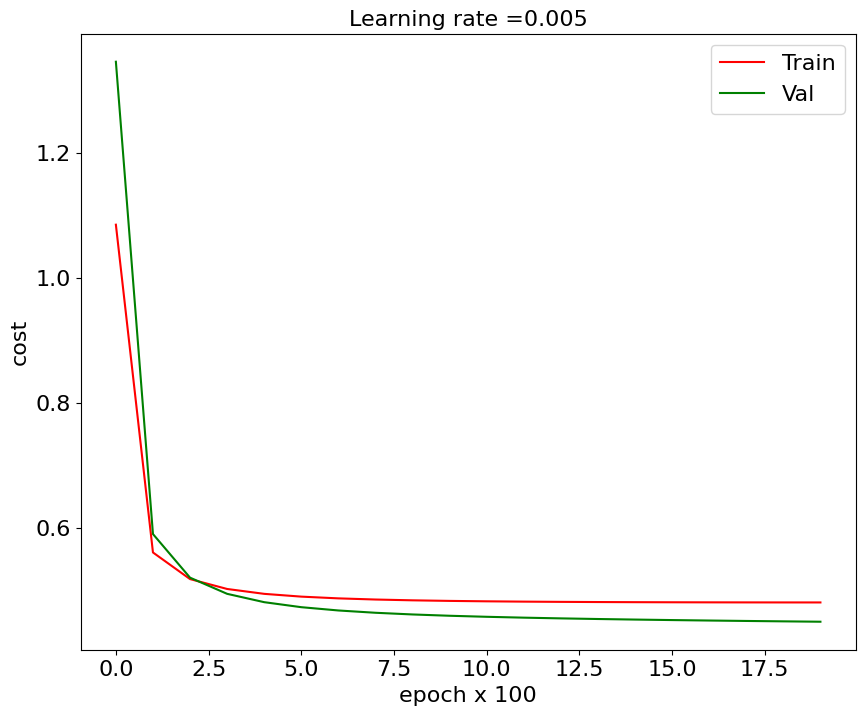

In [54]:
costs = np.squeeze(d['costs'])
costs_val = np.squeeze(d['costs_val'])
plt.figure(figsize=(10,8)) 

plt.plot(costs, color='red')
plt.plot(costs_val, color='green')
plt.ylabel('cost', size=16)
plt.xlabel('epoch x 100', size=16)
plt.title("Learning rate =" + str(d["learning_rate"]), size=16)
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

learning rate is:  0.005
Train (10, 357) (1, 357)
val (10, 40) (1, 40)
(10, 1)
train accuracy: 51.850718917015904 %
val accuracy: 54.10533098269602 %

-------------------------------------------------------

learning rate is:  0.003
Train (10, 357) (1, 357)
val (10, 40) (1, 40)
(10, 1)
train accuracy: 51.38075362947441 %
val accuracy: 53.13026917952961 %

-------------------------------------------------------

learning rate is:  0.001
Train (10, 357) (1, 357)
val (10, 40) (1, 40)
(10, 1)
train accuracy: 48.39480030773331 %
val accuracy: 50.37850260360248 %

-------------------------------------------------------



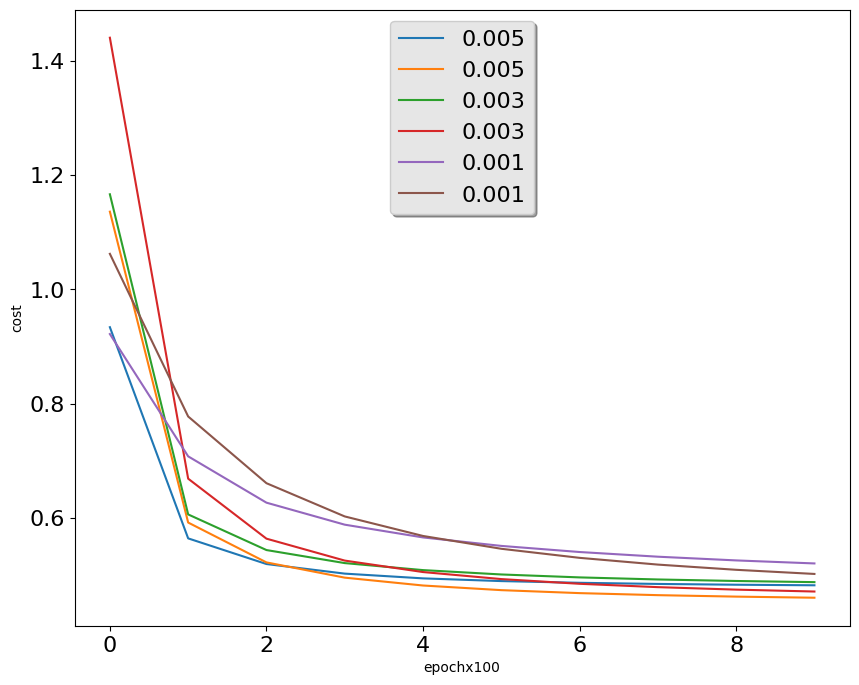

In [55]:
plt.figure(figsize=(10,8))

learning_rates = [0.005, 0.003, 0.001]
val_ratio = 0.1
models = {}

for i in learning_rates:
    print ("learning rate is: ", i)
    models[str(i)] = model_1(train_x, train_y, val_ratio=val_ratio, epochs = 1000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
    plt.plot(np.squeeze(models[str(i)]["costs_val"]), label= str(models[str(i)]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('epochx100')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

<font size=6 color='blue'>

<center> Artificial Neural Networks </center>




<font size=4>

Inspirandose en modelos que intentan describir las conecciones entre las neuronas en nuestro cerebro, se propusieron (y se siguen proponiendo) modelos de redes neuronales para generar sistemas de aprendizaje. Se les conoce con el nombre de redes neuronales artificiales, o simplemente como redes neuronales.

[A model of a neuron 1943](./Literatura/neural-network-origin-concept/McCulloch-Pitts_1943.pdf)

<font size=5 color='blue'>
Implementación de una red neuronal del tipo "Feed Forward" (FFN).

<font size=4>

<p>En nuestro primer modelo, la red neuronal tiene 3 capas: la capa de entrada, la capa de salida y una capa interior (en la literatura, a esta capa interior se le da el nombre de capa oculta). </p>
<p>El objetivo del modelo es encontrar una función que describa la evolución de la Diabetes Mellitus en una año, a partir de su linea base, con los rasgos de la persona que se consideran importantes para su evolución. 

Los rasgos propuestos son: edad, sexo, índice de masa corporal, presión arterial promedio y las seis mediciones de suero sanguíneo descritas al inicio de esta presentación: el colesterol total, la densidad baja de lipoproteinas, la densidad alta de lipoproteinas, los trigliceridos, la concentración de lamorigina y la glucosa</p>
<p>Esta función se genera mediante una red de neuronas artificiales. Se entiende como neurona un modelo matemático simple de una neurona biológica.</p>
</font>

<font size=4>
    
## Definición de la arquitectura de la red neuronal.

Se emplea indistintamente la palabra neurona o nodo para referirse al modelo matematico de la neurona.

El número de nodos en la capa de entrada depende del numero de rasgos del sistema que definen la variable objetivo, $Y$, la evolución de la diabetes en un año. En el presente caso el número de rasgos, $X$ es diez.

El número de nodos en la capa de salida depende del tipo de problema. En el presente caso, se tiene una sola neurona, cuya salida nos da un número que cuantifica la evolución de la diabetes en un año.

En el presente modelo, sólo tenemos una capa interna, el número de nodos en ella es variable. Se hacen pruebas con diferentes números y se adopta el que genere los mejores resultados.

La función layer_sizes() genera la arquitectura de la red neuronal partiendo de los datos con que se van a alimentar a la red.


In [56]:
def layer_sizes(X, Y, n_h):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = X.shape[0] 
    
    n_h = n_h
    
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [57]:
n_h = 4
n_x, n_h, n_y = layer_sizes(train_x, train_y, n_h = n_h)

In [58]:
print(n_x, n_h, n_y)

10 4 1


<font size=5 color='blue'>
Network Visualization     
 
<font size=4 color='black'> 
Emplearemos la biblioteca en python Networkx, la cual permite la creación, manipulación y estudio de la arquitecura, dinámica y funciones complejas de redes.   
    
[NetworkX](https://networkx.github.io/)

In [61]:
import networkx as nx

class Network(object):
    
    def  __init__ (self,sizes):
        self.num_layers = len(sizes)
        print("It has", self.num_layers, "layers,")
        self.sizes = sizes
        print("with the following number of nodes per layer",self.sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, x_of_sample):
        """Return the output of the network F(x_of_sample) """        
        for b, w in zip(self.biases, self.weights):
            x_of_sample = sigmoid(np.dot(w, x_of_sample)+b)
        return x_of_sample
    
    def graph(self,sizes):
        a=[]
        ps={}
        Q = nx.Graph()
        for i in range(len(sizes)):
            Qi=nx.Graph()    
            n=sizes[i]
            nodos=np.arange(n)
            Qi.add_nodes_from(nodos)
            l_i=Qi.nodes
            Q = nx.union(Q, Qi, rename = (None, 'Q%i-'%i))
            if len(l_i)==1:
                ps['Q%i-0'%i]=[i/(len(sizes)), 1/2]
            else:
                for j in range(len(l_i)+1):
                    ps['Q%i-%i'%(i,j)]=[i/(len(sizes)),(1/(len(l_i)*len(l_i)))+(j/(len(l_i)))]
            a.insert(i,Qi)
        for i in range(len(a)-1):
            for j in range(len(a[i])):
                for k in range(len(a[i+1])):
                    Q.add_edge('Q%i-%i' %(i,j),'Q%i-%i' %(i+1,k))
        nx.draw(Q, pos = ps)

It has 3 layers,
with the following number of nodes per layer [10, 4, 1]


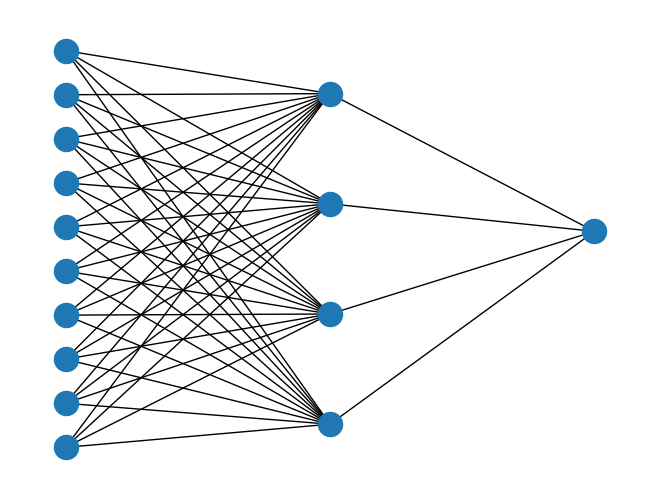

In [62]:
layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>
    
 Inicializacion de los pesos y el bias.

<font size=4>

La funcion initialize_parameters() inicializa a los pesos $W$ y el bias $b$. 

Dado que se tiene un conjunto de variables independientes, se debe definir un peso para cada variable, esto para una sola neurona de la siguiente capa. 

Entonces $W_1$ ahora es una matriz de tamaño $(n_h, n_x)$, en donde $n_h$ es el numero de nodos en la capa intera y $n_x$ es el numero de nodos en la capa de entrada, es decir, es el numero de variables independientes (rasgos).

Para cada neurona en la capa interna hay un bias, por lo que ahora $b_1$ es un vector de tamaño $(n_h, 1)$. 

En general para cada par de capas consecutivas debe haber una matriz $W$ y un vector $b$.

Generalizando:

$W_i$ y $b_i$ son los parametros a definir entre la capa $i$ y la capa $i+1$. Si la capa $i$ tiene $n_i$ neuronas y la capa $i+1$ tiene $n_{i+1}$ neuronas, entonces las dimensiones de $W_{i}$ son $(n_{i+1}, n_i)$ y las de $b_i$ son $(n_{i+1}, 1)$.

In [63]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) 
    
    W1 = np.reshape(np.random.uniform(-0.1, 0.1, n_h*n_x), (n_h, n_x)) #[4,10]*[10,1] = [4,1]
        
    b1 = np.zeros((n_h, 1)) #[4,1]
    
    W2 = np.reshape(np.random.uniform(-0.1, 0.1, n_y*n_h), (n_y, n_h)) #[1,4]*[4,1]=[1,1]
        
    b2 = np.zeros((n_y, 1)) #[1,1]
    
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [64]:
initialize_parameters(n_x, n_h, n_y)

{'W1': array([[-0.01280102, -0.09481475,  0.0099325 , -0.01293552, -0.01592644,
         -0.03393304, -0.05907027,  0.02385419, -0.04006907, -0.04663454],
        [ 0.02422677,  0.00582842, -0.07308401,  0.00271562, -0.06311203,
          0.05706703,  0.07079506, -0.00115263,  0.0693123 , -0.0840709 ],
        [ 0.00104922, -0.0869427 , -0.01437553, -0.08069382, -0.07456801,
          0.01934906, -0.0547976 , -0.07861086, -0.05593876, -0.03003474],
        [-0.0064425 , -0.05965135,  0.02808135, -0.00338603,  0.00104734,
         -0.02262147,  0.05872749,  0.01600084, -0.06754028,  0.04015047]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 9.29102160e-02,  1.67223404e-06,  7.79040128e-02,
         -3.16772695e-02]]),
 'b2': array([[0.]])}

<font size=5 color='blue'>

Conección entre las neuronas de capas contiguas.

<font size=4>

La funcion *propagate()* realiza la combinacion lineal entre los valores de salida de los nodos de una capa con los pesos y bias definidos entre esa capa y la siguiente. 

La función de activación que se aplica a esta sumatoria, es para considerar efectos no lineales.


___

Funciones de activación disponibles en la presente notebook: 

In [65]:
#Función para considerar los efectos no lineales.
#En el presente caso se considera un modelo completamente lineal.
#Por ello la función es la identidad.

def identity(z):
    """
    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- z
    """
    s = 1.0 * z
    
    return s

In [66]:
def identity_derivative(z):
    return 1.0 * z * (1/z)

In [67]:
def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

In [68]:
def tanh_derivative(z):
    return 1-np.power(tanh(z), 2)

In [69]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1/(1+np.exp(-z))
    
    return s

In [70]:
def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

In [71]:
def propagate(X, Y, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Zi es la combinacion lineal entre x y w
    # Ai es la aplicacion de una funcion de activacion a Zi
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2
    
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    m = Y.shape[1] # number of samples

    cost = (1/m)*np.sum((Y-A2)**2)
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Calculo de derivadas
    
    dZ2 = 2*(A2-Y)
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2)*tanh_derivative(A1)
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    
    return A2, cache, cost, grads

In [72]:
def validation(X, Y, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    Y -- output data of size (n_y, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    cost -- the value of cost
    grads -- a dictionary contains derivatives to update parameters
    """
    # Regresa cada parametro del diccionario "parameters"
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Pasos 1 y 2:
    
    # Zi es la combinacion lineal entre x y w
    # Ai es la aplicacion de una funcion de activacion a Zi:
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2
    
    # se verifican las dimensiones de A2:
    
    assert(A2.shape == (1, X.shape[1]))

    # Paso 3:
    
    # numero de muestras:
    
    m = Y.shape[1] 
    
    # se calcula el costo:

    cost = (1/m)*np.sum((Y-A2)**2)
    
    # Asegura que cost sea un escalar:
    
    cost = np.squeeze(cost)      
                                
    assert(isinstance(cost, float))  
    
    return cost

<font size=5 color='blue'>

Cálculo de la función de costo durante la optimización de los parámetros que definen al modelo.

<font size=4>

Recordemos que la funcion de costo, $J$, nos permite saber qué tan bien se esta ajustando el modelo a la variable objetivo de las muestras. Es decir, como se comporta el sistema de aprendizaje. 

Para ello se buscan los parámetros que minimizen a esta función. 

En el presente caso, la función de costo está definida por la relación siguiente: 

$$J = \dfrac{1}{m} \sum_{i=1}^{m}(a_i - y_i)^2$$

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of samples

    cost = (1/m)*np.sum((Y-A2)**2)
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

<font size=4>

Para encontrar a los valores optimos de los parametros, estos se acualizan en cada época empleando el algoritmo de gradiente descendente. El cual esta definido por la siguientes relaciones:

$$ \omega_{k-new} = \omega_k - \alpha \dfrac{\partial J(\omega, b)}{\partial \omega_k}$$

$$ b_{l-new} = b_l - \alpha \dfrac{\partial J(\omega, b)}{\partial b_l}$$

Es por ello necesario calcular las derivadas del costo respecto a cada uno de los parametros que definen al sistema de aprendizaje. $\alpha$ es la relación de aprendizaje.

def calculation_of_derivatives(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Calculo de derivadas
    
    dZ2 = 2*(A2-Y)
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

<font size=5 color='blue'>
Optimizacion de los pesos y los bias. Actividad de aprendizaje.

In [73]:
def optimize(parameters, grads, learning_rate = 0.1):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

<font size=5 color='blue'>
Las predicciones se realizan con los parametros óptimos encontrados durante el entrenamiento.

In [74]:
def predict(parameters, X, Y):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    predictions =  []
    A2, cache, cost, grads = propagate(X, Y, parameters)
    predictions = identity(A2) 
    
    return predictions

<font size=5 color='blue'>
    
Las funciones anteriores se integran para generar, entrenar y validar la red neuronal.

In [75]:
def nn_model(X, Y, val_ratio, n_h, epochs, alpha, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    train_ratio = int((1-val_ratio)*X.shape[1])
    X_val = X[:,train_ratio:]
    Y_val = Y[:,train_ratio:]

    X = X[:,:train_ratio]
    Y = Y[:,:train_ratio]
    
    print("Train",X.shape,Y.shape)
    print("val",X_val.shape,Y_val.shape)
    
    np.random.seed(3)
    
    n_x, n_h, n_y = layer_sizes(X, Y, n_h = n_h)
        
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"] 
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)
    
    costs=[]
    costs_val = []
    params = []
    

    for i in range(0, epochs):
         
        A2, cache, cost, grads = propagate(X, Y, parameters)
        
        cost_val = validation(X_val, Y_val, parameters)
 
        parameters = optimize(parameters, grads, alpha)
        
        params.append(parameters)
        
        costs.append(cost)
        
        costs_val.append(cost_val)
                
        # Print the cost every 1000 iterations
        if print_cost and i % 100 == 0:
            print ("Cost and Cost_val in epoch %i: %f %f" %(i, cost, cost_val))
            
    return parameters, costs, params, costs_val

<font size=5 color='blue'>

Entrenamiento:

<font size=4 color='black'> 
Para monitorear el entrenamiento, las muestras para el entrenamiento se dividen en dos grupos:

<font size=4 color='black'>
El (1.0 - val_ratio) (90% en el presente caso) de ellas se emplean para realizar el entrenamiento y el (val_ratio) (el 10% en el presente caso) restante para evaluar, "validar", la calidad del entrenamiento.
$$$$    
En la literatura, este procedimiento se conoce como "$Cross-Validation$"

In [76]:
epochs = 2000
learning_rate = 0.008
val_ratio = 0.1
n_h = 4

opt_parameters, costs, params, costs_val = nn_model(train_x, train_y, val_ratio=val_ratio, n_h = n_h, epochs = epochs, alpha=learning_rate, print_cost=True)


Train (10, 357) (1, 357)
val (10, 40) (1, 40)
Cost and Cost_val in epoch 0: 1.000201 1.184284
Cost and Cost_val in epoch 100: 0.806882 0.931852
Cost and Cost_val in epoch 200: 0.549854 0.535533
Cost and Cost_val in epoch 300: 0.496353 0.449398
Cost and Cost_val in epoch 400: 0.481372 0.430751
Cost and Cost_val in epoch 500: 0.477224 0.427980
Cost and Cost_val in epoch 600: 0.475669 0.428767
Cost and Cost_val in epoch 700: 0.474854 0.429962
Cost and Cost_val in epoch 800: 0.474326 0.430876
Cost and Cost_val in epoch 900: 0.473930 0.431443
Cost and Cost_val in epoch 1000: 0.473599 0.431733
Cost and Cost_val in epoch 1100: 0.473301 0.431821
Cost and Cost_val in epoch 1200: 0.473018 0.431771
Cost and Cost_val in epoch 1300: 0.472743 0.431624
Cost and Cost_val in epoch 1400: 0.472469 0.431411
Cost and Cost_val in epoch 1500: 0.472195 0.431152
Cost and Cost_val in epoch 1600: 0.471917 0.430859
Cost and Cost_val in epoch 1700: 0.471634 0.430539
Cost and Cost_val in epoch 1800: 0.471345 0.4301

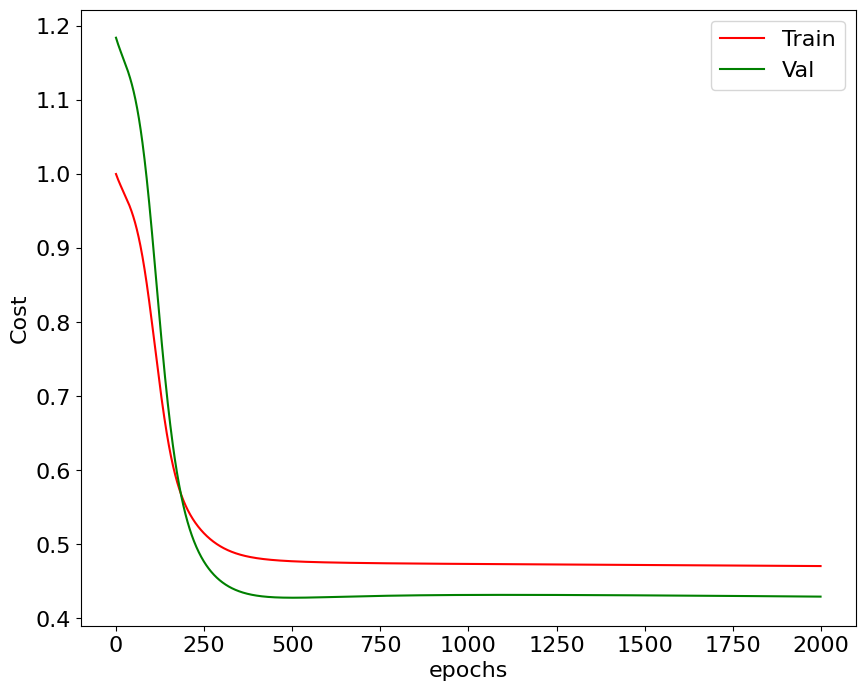

In [77]:
costs = np.squeeze(costs)

plt.figure(figsize=(10,8)) 
plt.plot(costs, color='red')
plt.plot(costs_val, color='green')

plt.ylabel('Cost', size=16)
plt.xlabel('epochs', size=16)
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

<font size=4>
    
 ## Precisión:

Para calcular la precisión del modelo se usa el error cuadrático medio, MSE:

$$100-MSE*100$$

es decir

$$100-(\dfrac{1}{m_{test}}\sum_{i=1}^{m_{test}} (y_{i}-a_{i})^2)*100$$

In [78]:
print(test_y.shape)

(1, 45)


In [79]:
predictions_test = predict(opt_parameters, test_x, test_y)
print(predictions_test.shape)

(1, 45)


In [80]:
predictions_test = predict(opt_parameters, test_x, test_y)

print("test accuracy: {} %".format(100 - np.mean(np.power(predictions_test-test_y, 2)) * 100))


test accuracy: 45.690426350595935 %


<font size=5 color='blue'>
    
## Desarrollo moderno de sistemas de aprendizaje

In [81]:
x_train = train_x.T
y_train = train_y.T

In [82]:
print(train_x.shape)
print(train_y.shape)
print(x_train.shape)
print(y_train.shape)

(10, 397)
(1, 397)
(397, 10)
(397, 1)


In [83]:
x_test = test_x.T
y_test = test_y.T

In [84]:
print(test_x.shape)
print(test_y.shape)
print(x_test.shape)
print(y_test.shape)

(10, 45)
(1, 45)
(45, 10)
(45, 1)


In [85]:
mu = df_train.mean()
sigma = df_train.std()
df_train_norm = (df_train - mu)/ sigma
df_train_norm.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
119,0.335209,-0.942461,-0.976628,-0.058872,-0.380025,-0.891602,0.710641,-0.819272,0.597978,0.599470,0.607085
207,0.183898,-0.942461,0.953450,0.580528,0.278171,-0.271609,0.554317,-0.819272,0.991090,0.770994,0.632786
236,0.562176,-0.942461,0.145511,0.722617,1.680416,1.528370,0.319833,0.771742,0.876726,0.256422,-1.102042
288,1.470042,1.058379,-0.348230,0.438439,0.936368,1.221707,0.788802,-0.023765,-1.445669,-0.343912,-0.934985
174,0.335209,1.058379,0.212839,-0.911406,-1.982591,-1.991589,-0.852591,-0.819272,0.381661,0.170660,-0.022594


In [92]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers

np.random.seed(1)

In [93]:
keras.__version__

'3.8.0'

## Definición de la arquitectura

In [94]:
def architecture(input_shape, activation):
    
    model = Sequential()
        
    model.add(Dense(4, kernel_initializer='uniform', bias_initializer='zeros', 
                    activation=activation, 
                    input_shape=input_shape))    
    model.add(Dense(1, kernel_initializer='uniform', bias_initializer='zeros', 
                    activation = activation))
    
    return model

In [95]:
input_shape = (10,)
activation = 'tanh'

model_keras = architecture(input_shape=input_shape, activation=activation)

InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version

In [96]:
plot_model(model_keras, to_file='model.png', show_shapes=True, rankdir='TB', 
      expand_nested=True, show_layer_names=True, dpi=96)

NameError: name 'model_keras' is not defined

In [97]:
model_keras.summary()

NameError: name 'model_keras' is not defined

## Compilación

In [ ]:
lr = 0.001
opt = Adam(learning_rate=lr)
loss = tf.keras.losses.MeanSquaredError()
acc = tf.keras.metrics.MeanSquaredError()

model_keras.compile(loss=loss, 
              optimizer=opt,
              metrics=[acc])

## Entrenamiento

In [ ]:
epochs = 200
val_split=0.1

history_model = model_keras.fit(x_train, y_train,
                          epochs=epochs,
                          batch_size=32,
                          validation_split=val_split, 
                          shuffle=True,
                          verbose=2)


Epoch 70/200
12/12 - 0s - loss: 0.5043 - mean_squared_error: 0.5043 - val_loss: 0.4659 - val_mean_squared_error: 0.4659
Epoch 71/200
12/12 - 0s - loss: 0.5040 - mean_squared_error: 0.5040 - val_loss: 0.4662 - val_mean_squared_error: 0.4662
Epoch 72/200
12/12 - 0s - loss: 0.5037 - mean_squared_error: 0.5037 - val_loss: 0.4675 - val_mean_squared_error: 0.4675
Epoch 73/200
12/12 - 0s - loss: 0.5038 - mean_squared_error: 0.5038 - val_loss: 0.4659 - val_mean_squared_error: 0.4659
Epoch 74/200
12/12 - 0s - loss: 0.5035 - mean_squared_error: 0.5035 - val_loss: 0.4668 - val_mean_squared_error: 0.4668
Epoch 75/200
12/12 - 0s - loss: 0.5033 - mean_squared_error: 0.5033 - val_loss: 0.4660 - val_mean_squared_error: 0.4660
Epoch 76/200
12/12 - 0s - loss: 0.5033 - mean_squared_error: 0.5033 - val_loss: 0.4668 - val_mean_squared_error: 0.4668
Epoch 77/200
12/12 - 0s - loss: 0.5034 - mean_squared_error: 0.5034 - val_loss: 0.4640 - val_mean_squared_error: 0.4640
Epoch 78/200
12/12 - 0s - loss: 0.5031 -

Epoch 138/200
12/12 - 0s - loss: 0.5000 - mean_squared_error: 0.5000 - val_loss: 0.4674 - val_mean_squared_error: 0.4674
Epoch 139/200
12/12 - 0s - loss: 0.4999 - mean_squared_error: 0.4999 - val_loss: 0.4667 - val_mean_squared_error: 0.4667
Epoch 140/200
12/12 - 0s - loss: 0.5001 - mean_squared_error: 0.5001 - val_loss: 0.4687 - val_mean_squared_error: 0.4687
Epoch 141/200
12/12 - 0s - loss: 0.5001 - mean_squared_error: 0.5001 - val_loss: 0.4684 - val_mean_squared_error: 0.4684
Epoch 142/200
12/12 - 0s - loss: 0.4998 - mean_squared_error: 0.4998 - val_loss: 0.4682 - val_mean_squared_error: 0.4682
Epoch 143/200
12/12 - 0s - loss: 0.4999 - mean_squared_error: 0.4999 - val_loss: 0.4687 - val_mean_squared_error: 0.4687
Epoch 144/200
12/12 - 0s - loss: 0.4999 - mean_squared_error: 0.4999 - val_loss: 0.4671 - val_mean_squared_error: 0.4671
Epoch 145/200
12/12 - 0s - loss: 0.4998 - mean_squared_error: 0.4998 - val_loss: 0.4673 - val_mean_squared_error: 0.4673
Epoch 146/200
12/12 - 0s - loss:

<font size=5 color="blue">

Gráfica del costo como función de la época    

In [ ]:
plt.plot(history_model.history['loss'], 'magenta')
plt.plot(history_model.history['val_loss'], 'blue')
plt.title('Loss function')
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right');

<font size=5, color=blue>
Evaluación del entrenamiento. Se realiza con los datos de prueba.

In [ ]:
scores = model_keras.evaluate(x_test, y_test)
print('Test loss:', scores[0])

<font size=5, color=blue>
Inferencia

In [ ]:
predictions = model_keras.predict(x_test)
print(len(predictions))

<font size=5, color=blue>
Predicción para el primer paciente del conjunto muestras test_x

In [ ]:
predictions[0]*sigma + mu